In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit

In [14]:
plt.style.use('stash/pp2latex.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"

# Data Import

In [15]:
co2y = np.loadtxt('../measurements/TCS_resp/CO2Y_point95W_step_minute_trend_october_18_2018.dat')     # CO2Y change by .95 W (Sensed by HWSY)
rhy = np.loadtxt('../measurements/TCS_resp/ITMY_trend_10min_int_longer.dat')                          # RHY change by ? W (Sensed by HWSY)
carr_self = np.loadtxt('../measurements/TCS_resp/1W_self_heating_defocus_doublepass.txt', skiprows=1) # Self heating model from COMSOL

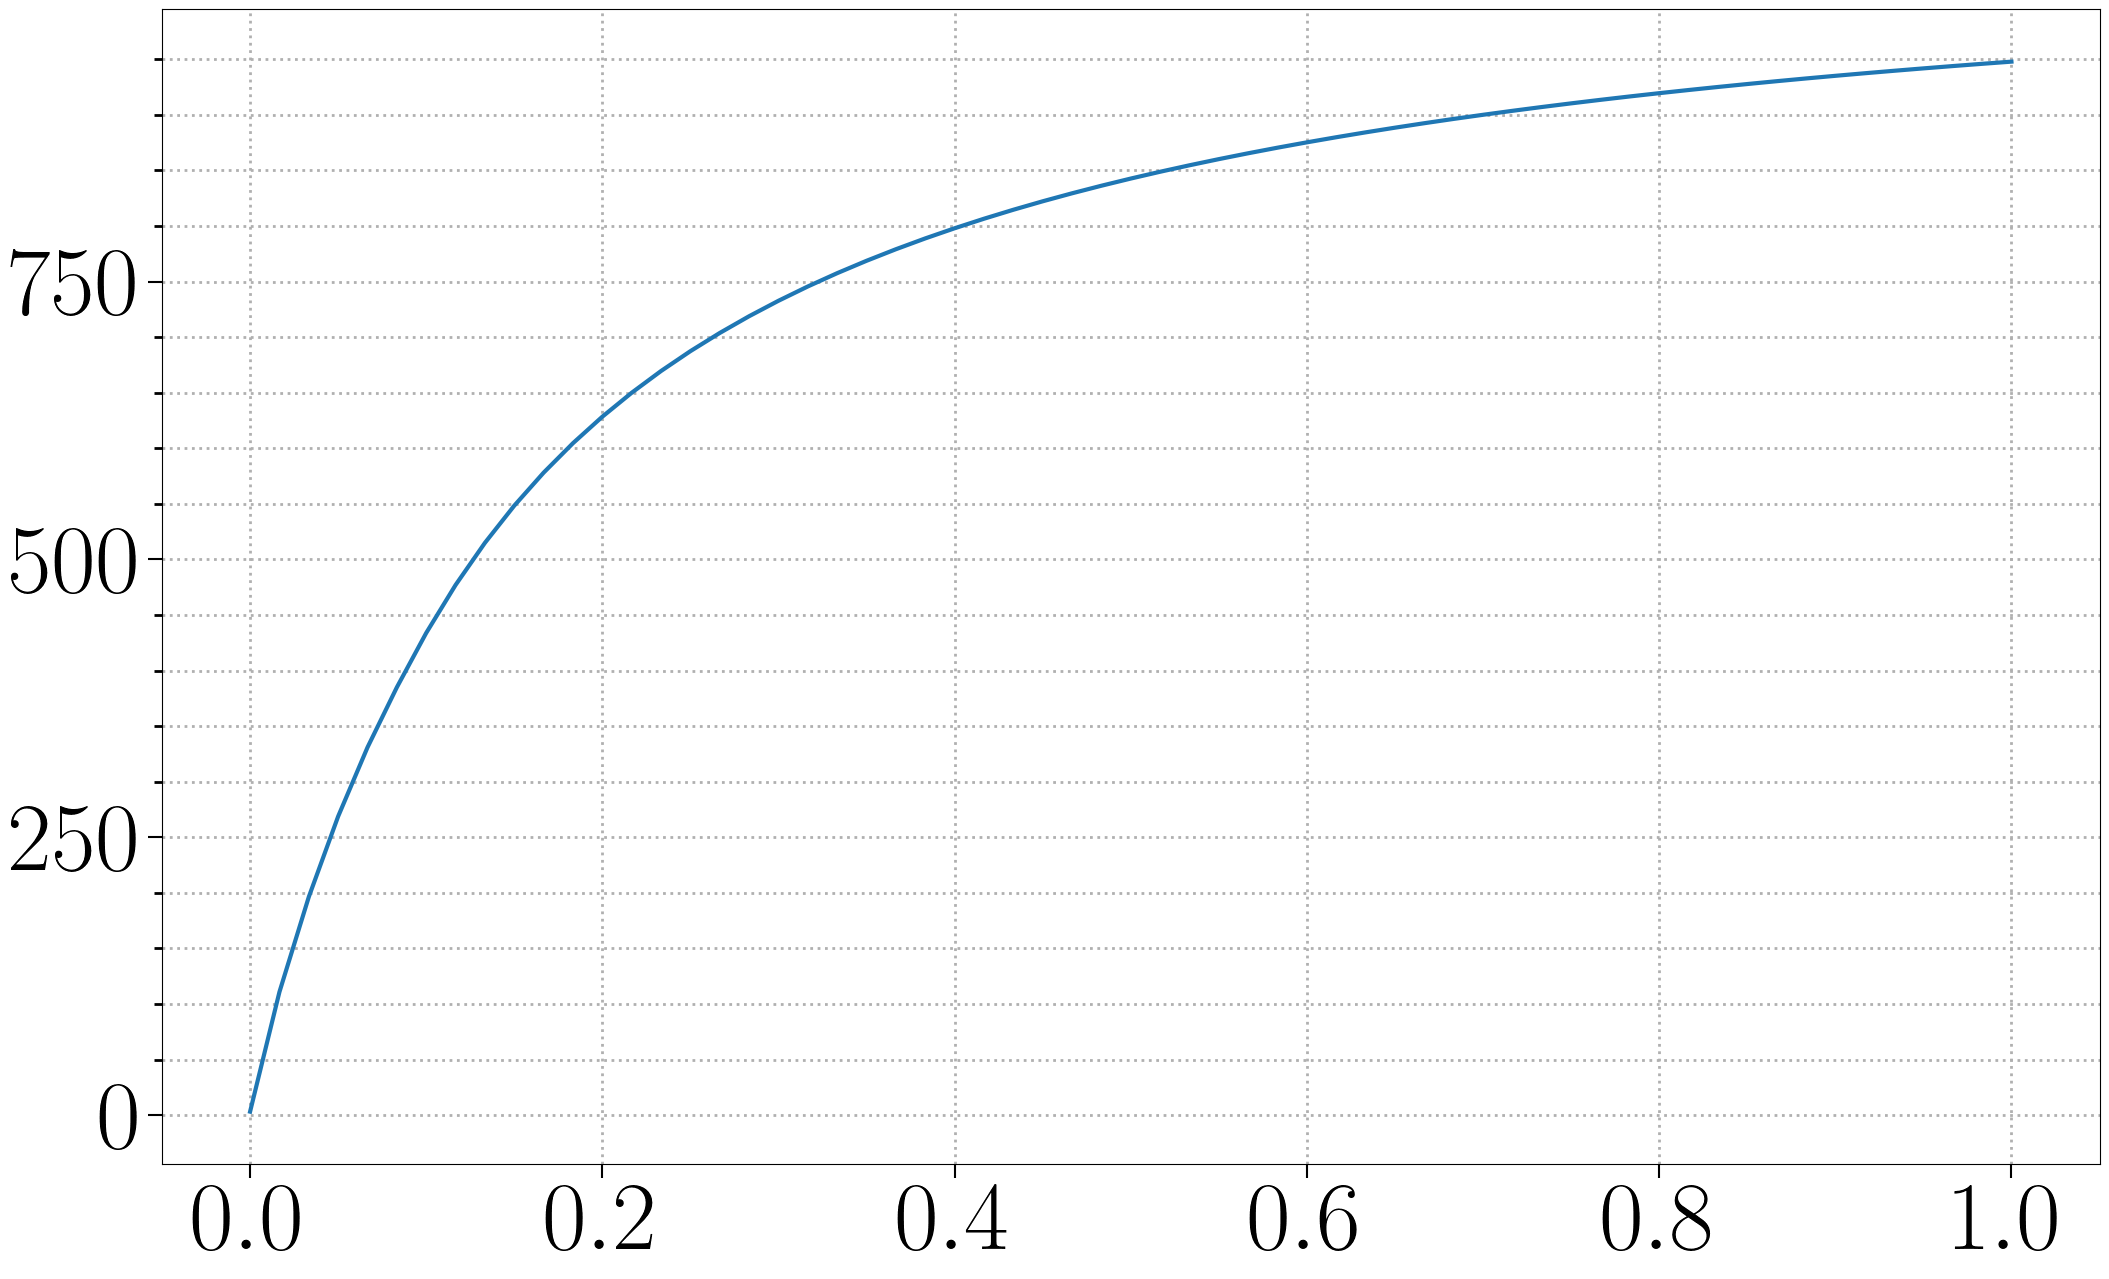

In [16]:
plt.plot(carr_self[:,0], carr_self[:,1])

# Data Pre-filter

Text(0, 0.5, 'Defocus [1/m]')

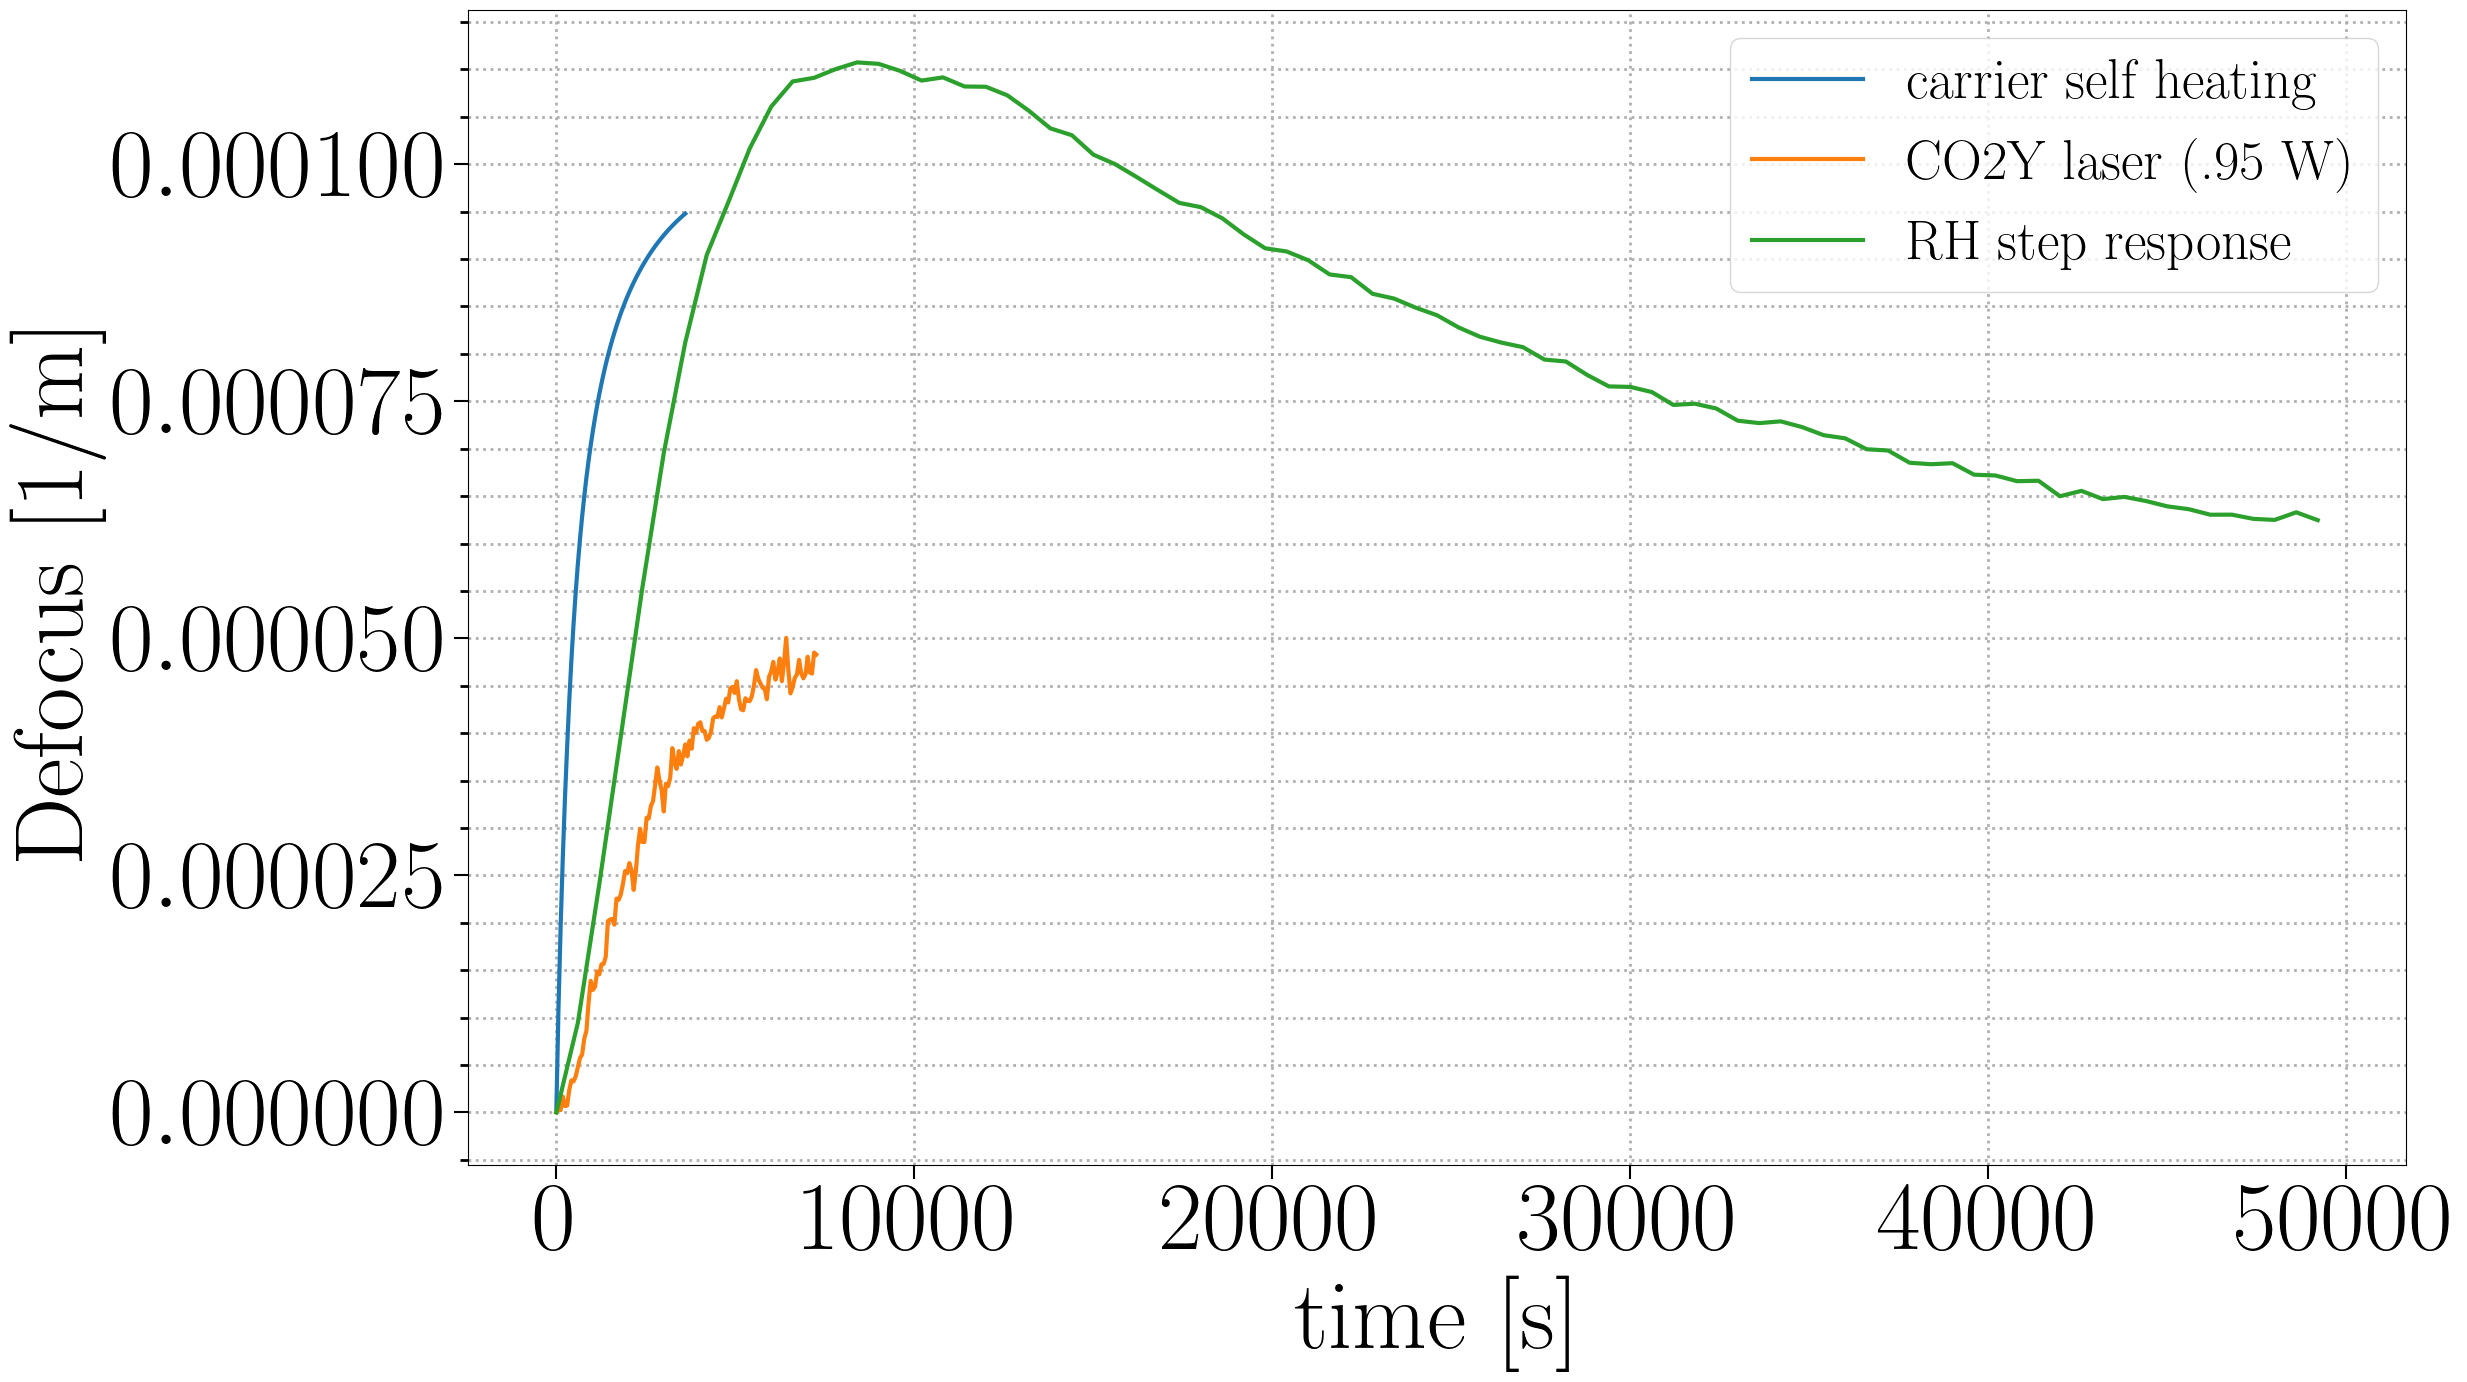

In [17]:
## COMSOL self heating
plt.plot(carr_self[:,0]*60*60, carr_self[:,1]*1e-7, label='carrier self heating')

## OCTOBER 18th CO2Y step response data
t = np.arange(0,len(co2y[:,0]),1)*60
co2y_ = co2y[:,1] + abs(min(co2y[:,1]))
plt.plot(t,co2y_, label='CO2Y laser (.95 W)')

## ITMY RH response data
plt.plot(np.arange(0,len(rhy[:,1][2:]))*600, rhy[:,1][2:]-min(rhy[:,1][2:]), label = 'RH step response')

plt.legend()
plt.xlabel('time [s]')
plt.ylabel('Defocus [1/m]')

In [18]:
b, a = signal.butter(4, 0.15)
b2, a2 = signal.butter(3, 0.0512)

In [19]:
b2, a2 = signal.butter(3, 0.0512)
co2y_smooth = signal.filtfilt(b2,a2,co2y[:,1])

In [20]:
y2 = signal.filtfilt(b,a,co2y[:,1])
rhy_smooth = signal.filtfilt(b,a,rhy[:,1][2:])

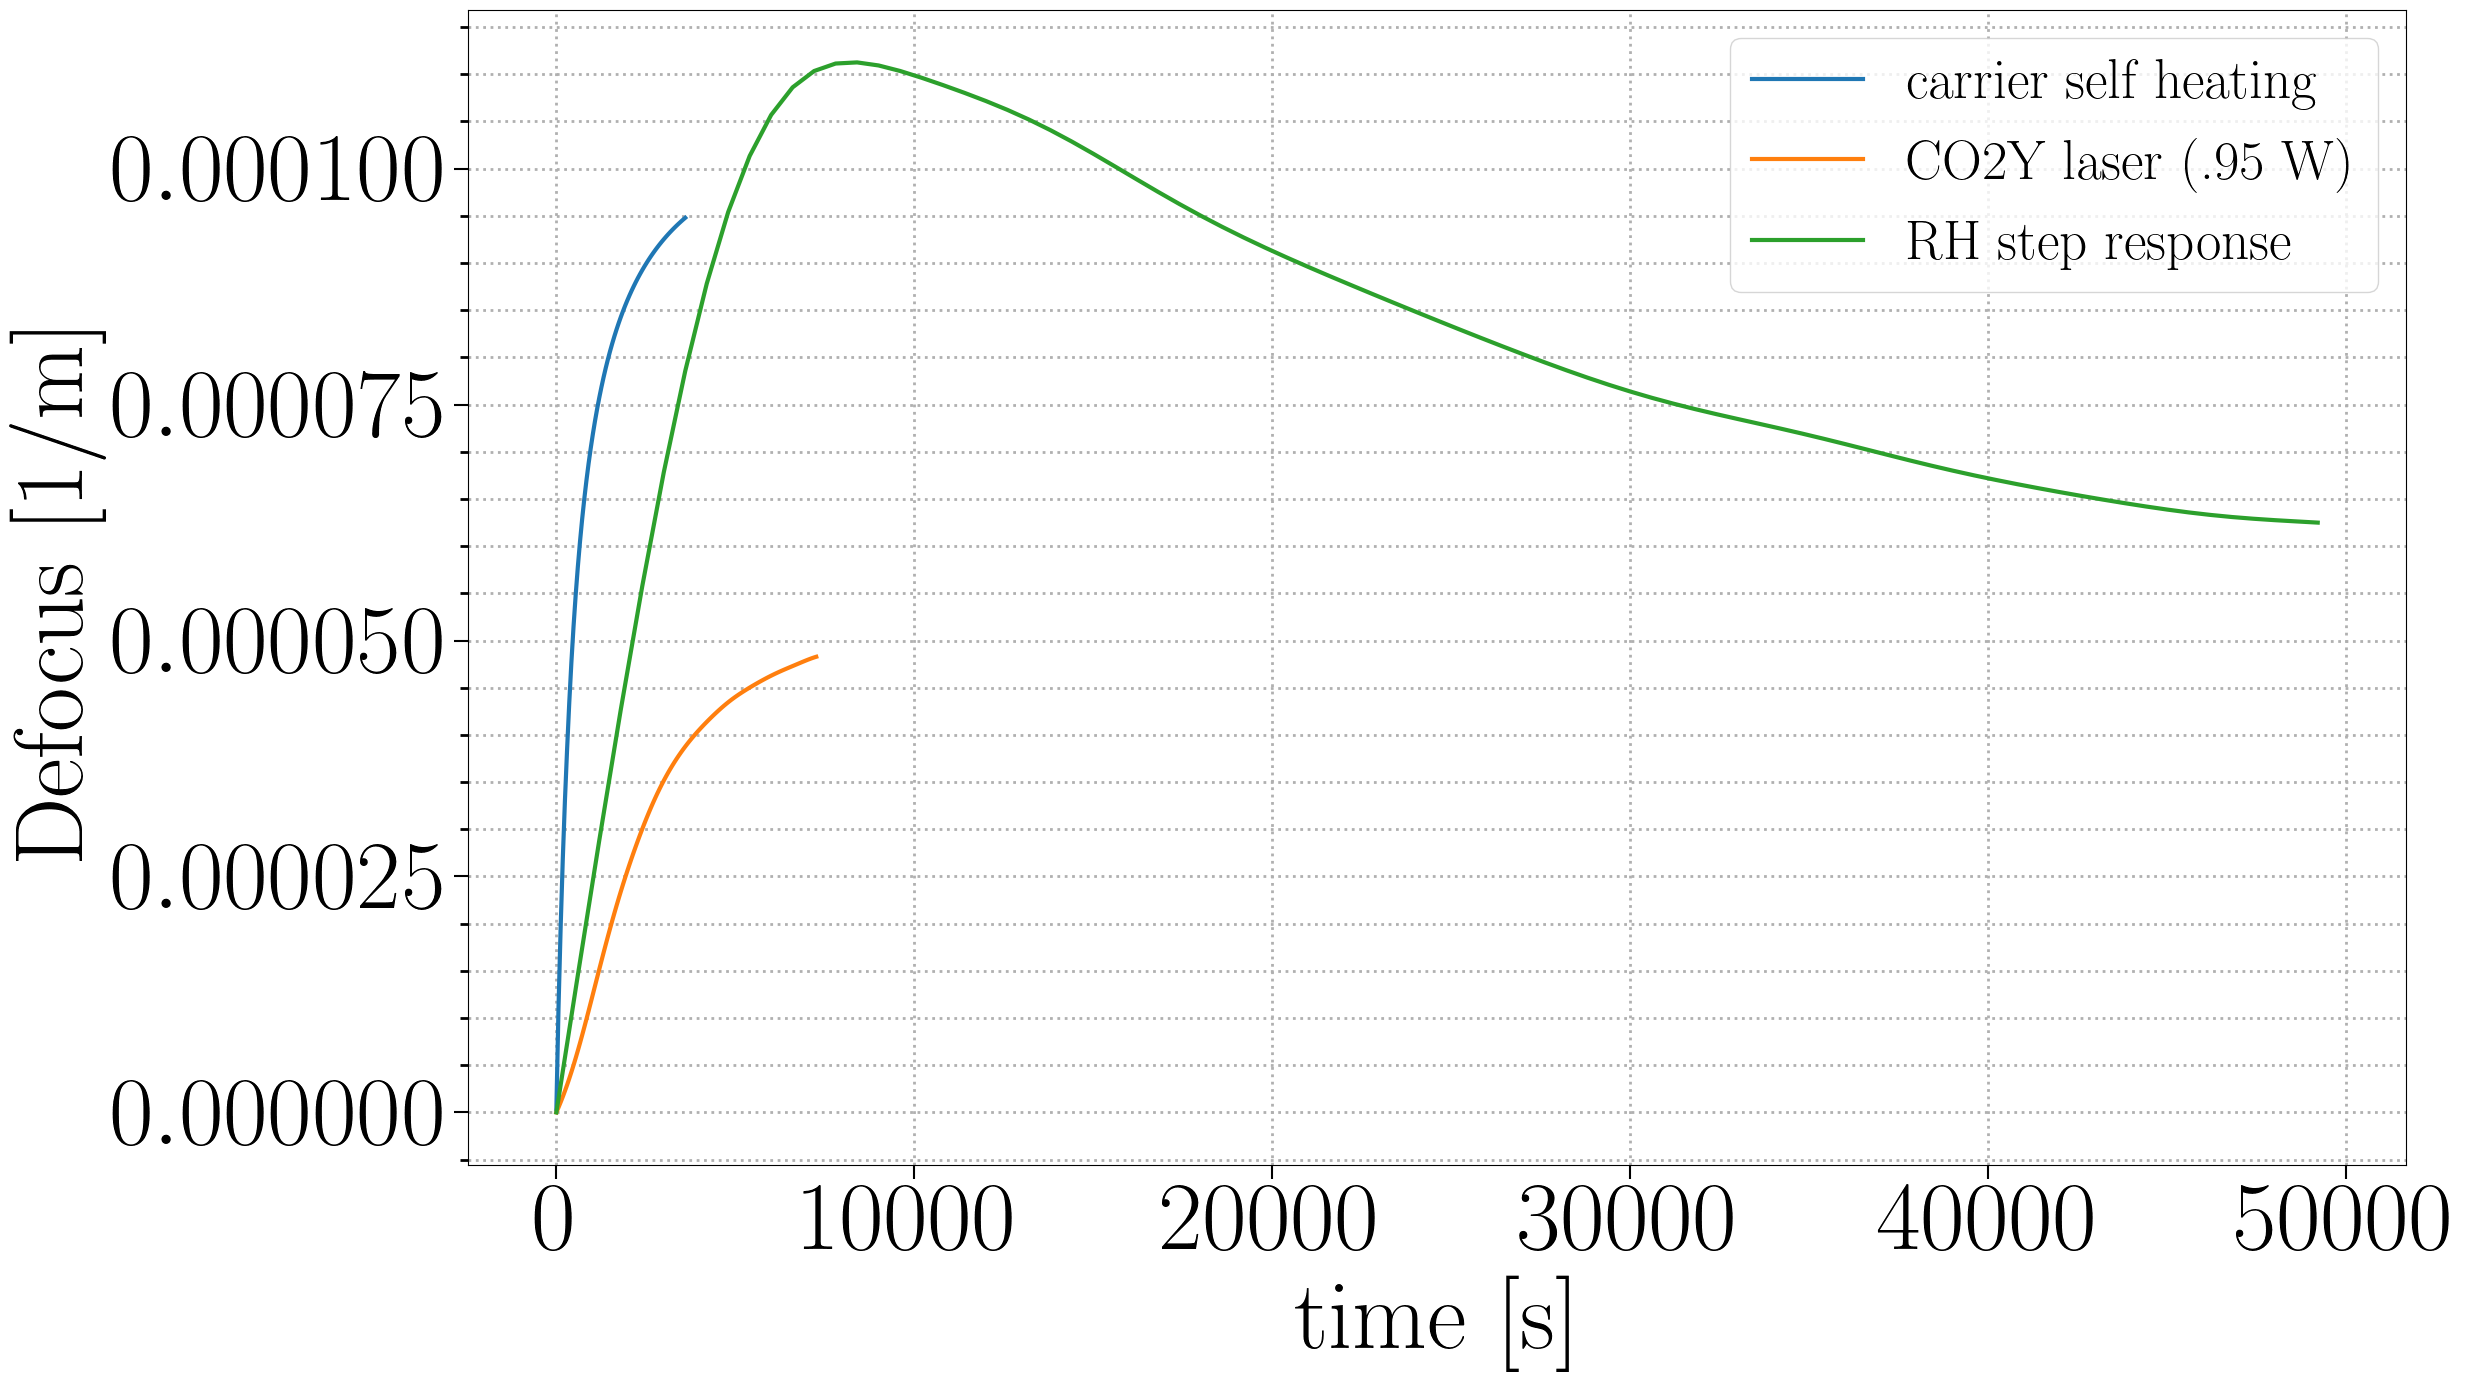

In [28]:
plt.plot(carr_self[:,0]*60*60, carr_self[:,1]*1e-7, label='carrier self heating')

plt.plot(t,co2y_smooth + abs(min(co2y_smooth)), label='CO2Y laser (.95 W)')

plt.plot(np.arange(0,len(rhy[:,1][2:]))*600,rhy_smooth-min(rhy_smooth), label='RH step response')
#plt.plot(rhy[:,0], rhy[:,1])

plt.legend()
plt.xlabel('time [s]')
plt.ylabel('Defocus [1/m]')
plt.savefig('../figs/TCS/TCS_resp.pdf', dpi=300, bbox_inches='tight')

## Generate TCS filters

# Compare to Hello - Vinet analytical solution

In [7]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

HWSY_real_decay_1 = np.max(HWSY) - HWSY

p_guess = [max(HWSY), .001, 0]

popt, pcov = curve_fit(func, t, HWSY_real_decay_1, p_guess )

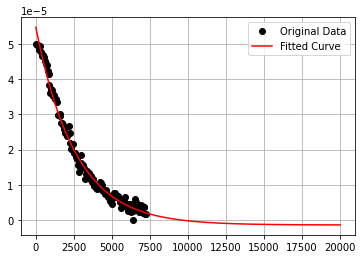

5.624708867502254e-05
0.00038564449682358144
-1.465048835667987e-06


In [9]:
t2 = range(0,20000)
plt.figure()
plt.plot(t, HWSY_real_decay_1, 'ko', label="Original Data")
#plt.plot(t, HWSY_decay, 'b^', label="2nd order butter filter (twice)")
plt.plot(t2, func(t2, *popt), 'r-', label="Fitted Curve")
plt.grid(True)
plt.legend()
plt.show()
print(popt[0])
print(popt[1])
print(popt[2])

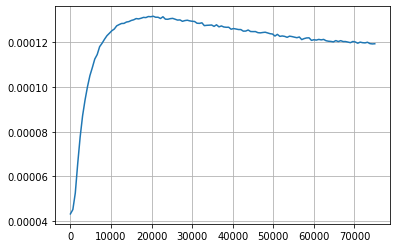

In [11]:
#IFO thermal response
#Load the Hartmann data
datay = np.loadtxt('../measurements/TCS_resp/ifo_thermal_response_12_07_2018/ITMY_HWS.dat')
datax = np.loadtxt('../measurements/TCS_resp/ifo_thermal_response_12_07_2018/ITMX_HWS.dat')

t_ifo = np.arange(0,len(datax[:-1,0]),1)*60*10
HWSY_ifo= datay[:-1,1]
HWSX_ifo =datax[:-1,1]
plt.plot(t_ifo,HWSY_ifo)
plt.grid(True)
plt.show()

In [16]:
y3

array([3.40349310e-06, 4.43337497e-06, 5.45629641e-06, 6.47067280e-06,
       7.47506379e-06, 8.46817653e-06, 9.44886690e-06, 1.04161388e-05,
       1.13691415e-05, 1.23071654e-05, 1.32296356e-05, 1.41361051e-05,
       1.50262453e-05, 1.58998367e-05, 1.67567582e-05, 1.75969752e-05,
       1.84205288e-05, 1.92275228e-05, 2.00181125e-05, 2.07924928e-05,
       2.15508868e-05, 2.22935355e-05, 2.30206876e-05, 2.37325909e-05,
       2.44294842e-05, 2.51115911e-05, 2.57791142e-05, 2.64322313e-05,
       2.70710924e-05, 2.76958184e-05, 2.83065009e-05, 2.89032029e-05,
       2.94859616e-05, 3.00547910e-05, 3.06096862e-05, 3.11506283e-05,
       3.16775896e-05, 3.21905400e-05, 3.26894525e-05, 3.31743099e-05,
       3.36451111e-05, 3.41018764e-05, 3.45446539e-05, 3.49735239e-05,
       3.53886036e-05, 3.57900502e-05, 3.61780644e-05, 3.65528913e-05,
       3.69148214e-05, 3.72641905e-05, 3.76013782e-05, 3.79268054e-05,
       3.82409311e-05, 3.85442483e-05, 3.88372786e-05, 3.91205667e-05,
      

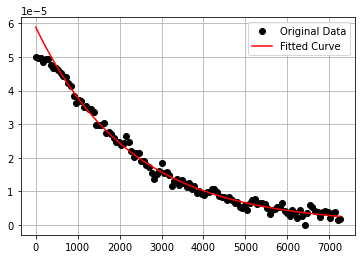

5.867393518730704e-05
0.0004429940902128605
1.945606530253643e-07


In [24]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

HWSY_real_decay = [(np.max(HWSY)-y3[i]) for i in range(len(y3))]

p_guess = [max(y3), .001, 0]

popt, pcov = curve_fit(func, t[8:-4], HWSY_real_decay, p_guess )

plt.figure()
plt.plot(t, HWSY_real_decay_1, 'ko', label="Original Data")
plt.plot(t, func(t, *popt), 'r-', label="Fitted Curve")
plt.grid(True)
plt.legend()
plt.show()
print(popt[0])
print(popt[1])
print(popt[2])